In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. ##

In [2]:
image = cv2.imread('lena512color.tiff' )#[:,:,::-1] # сразу BRG -> RGB

In [3]:
cv2.imshow('win', image)
cv2.waitKey(0)
cv2.destroyWindow("win")

In [4]:
def draw(event, x:float, y:float, parameters, par_img: np.ndarray) -> None:
    if (event == cv2.EVENT_MBUTTONDOWN):
        # вставить надпись 'Hello, World!'
        cv2.putText(par_img, 'Hello, World!', (x,y), fontFace = cv2.FONT_ITALIC, fontScale = 0.5, color = (255, 255, 255))
        cv2.imshow('win', image)
        print ('Hello, world!')
    elif (event == cv2.EVENT_LBUTTONDOWN):
        # рисовать круги
        cv2.circle(par_img, (x,y), radius = 20, color = (0, 0, 0))
        cv2.imshow('win', image)
        print ('circle')
    elif (event == cv2.EVENT_RBUTTONDOWN):
        # рисовать точки
        cv2.rectangle(par_img, (x,y),(x+1,y+1),(0,0,0),-1)
        cv2.imshow('win', image)
        print ('point')
    elif ((event == cv2.EVENT_MOUSEMOVE) and (parameters & cv2.EVENT_FLAG_CTRLKEY)):
        # рисовать линии 
        # зажать ctrl и рисовать
        cv2.rectangle(par_img, (x,y),(x+1,y+1),(0,0,0),-1)
        cv2.imshow('win', image)

In [5]:
cv2.imshow( "win", image )
cv2.setMouseCallback("win", draw, image)
print(cv2.waitKey(0))
cv2.destroyWindow("win")

circle
circle
circle
point
point
point
point
point
-1


Сохранение

In [6]:
cv2.imwrite("photo_draw.jpg", image)

True

## 2. ##

In [3]:
path = "1_video.mp4"

## Работа со всем видео целиком ##

In [7]:
def process_video(path: str = "1_video.mp4", speed: int = 10, gray: bool = False, rotate: bool = True, 
                  Noise: int = 0, lines: bool = False, shift: int = 0, filter_: bool or str = False, 
                  edges: bool = False) -> None:
    # Читаем файл с видео
    cap = cv2.VideoCapture(path)
    
    while True: # cap.isOpened():
        return_, frame = cap.read()
        
        # проверка прочтения кадра
        if (return_ == False):
            break
        # взятие параметров кадра для дальнейшей работы
        (h, w, d) = frame.shape
        
        # поворот картинки на 90 градусов
        if (rotate == True):
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, 270, 1.0)
            frame = cv2.warpAffine(frame, M, (w, h))
        
        # эффекты
        
        # добавить снега
        x = np.random.random_integers(h-1, size=Noise)
        y = np.random.random_integers(w-1, size=Noise)
        for i in range(len(x)//2):
            frame[ x[i], y[i] ] = [255, 255, 255]
        
        # добавить линий
        if (lines == True):
            x_lines = np.random.random_integers(1, w-1)
            for _ in range(0, w, w//3):
                frame[:, x_lines-1] = [255,255,255]
                frame[:, x_lines] = [255,255,255]
        
        # сдвиг цветов
        frame += shift
        
        # фильтр
        if (filter_ != False):
            if (filter_ == 'bilateral'):
                frame = cv2.bilateralFilter(frame, 10, sigmaColor = 1000, sigmaSpace = 0)
            if (filter_ == 'blur'):
                frame = cv2.medianBlur(frame, 5)
        
        # трясущиеся края
        if (edges == True):
            x_s = np.random.random_integers(10)
            y_s = np.random.random_integers(10)
            frame[:x_s,:] = 0
            frame[-x_s:,:] = 0
            frame[:,:y_s] = 0
            frame[:,-y_s:] = 0
        
        if (gray == True):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(speed) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [8]:
process_video(path, speed = 1, gray = False, rotate = True, Noise = 0, lines = False, shift = 0, filter_ = False, edges = False) # видео здорового человека

In [9]:
process_video(path, speed = 1, gray = False, rotate = True, Noise = 1000, lines = True, shift = 0, filter_ = False) # видео с шумом, линиями, но без фильтра

In [10]:
process_video(path, speed = 1, gray = False, rotate = True, Noise = 100, lines = True, shift = 0, filter_ = 'blur') # видео с шумом, линиями и с фильтром

In [12]:
process_video(path, speed = 1, gray = False, rotate = True, Noise = 100, lines = True, shift = 500, filter_ = 'blur', edges = True) # видео со сломанными цветами

In [13]:
process_video(path, speed = 1, gray = True, rotate = True, Noise = 10000, lines = True, shift = 0, filter_ = 'blur', edges = True) # видео под старину

## Работа с одним кадром из видео ##

In [30]:
def take_image(path: str, frame: int, show_frames: bool = True) -> np.ndarray:
    """Берет на вход путь к видео-файлу, а также кадр, который нужно извлечь. Возвращает кадр."""
    cap = cv2.VideoCapture(path)
    assert (cap.isOpened() != False), 'Ошибка открытия'
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    assert (frame > 0 and frame < totalFrames and type(frame) is int), 'Неправильный формат frame'
    if (show_frames == True):
        print (totalFrames)
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    image = cap.read()[1][:,:,::-1] # в RGB сразу, ибо читать буду с plt
    return image

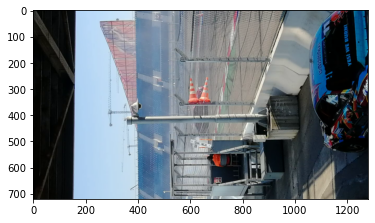

In [5]:
image = take_image(path, 125, False)
plt.imshow(image)
# Все работает, но так как видео снято с телефона и имеет вертикальный формат, то надо повернуть

**Надо повернуть**

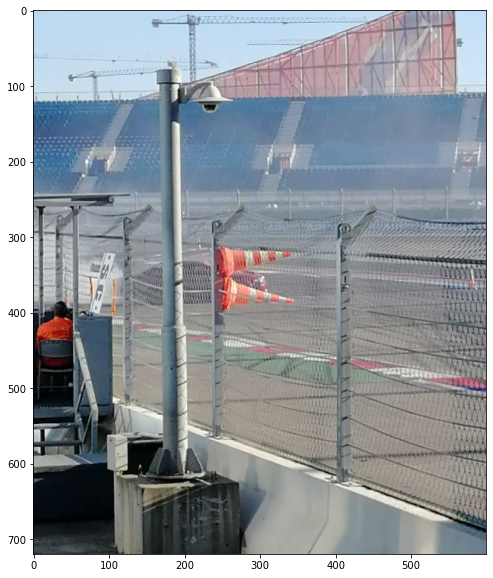

In [23]:
(h, w, d) = image.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 270, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.figure(figsize = (10,10))
rotated = rotated[:, 400:1000, :]
plt.imshow(rotated)

Теперь можно поиздеваться над этим фото

In [24]:
rotated.shape

(720, 600, 3)

**Горизонтальные полосы**

In [25]:
for i in range(0, len(rotated), 10):
    rotated[i] = 255

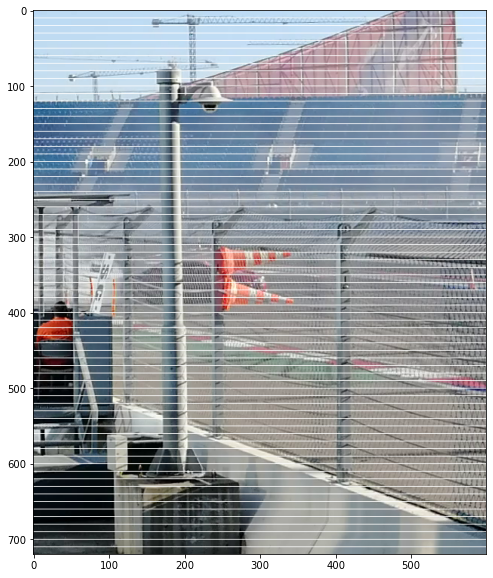

In [26]:
plt.figure(figsize = (10,10))
plt.imshow(rotated)

**Вертикальные полосы**

In [27]:
for i in range(0, len(rotated[0,:]), 10):
    rotated[:,i] = 255

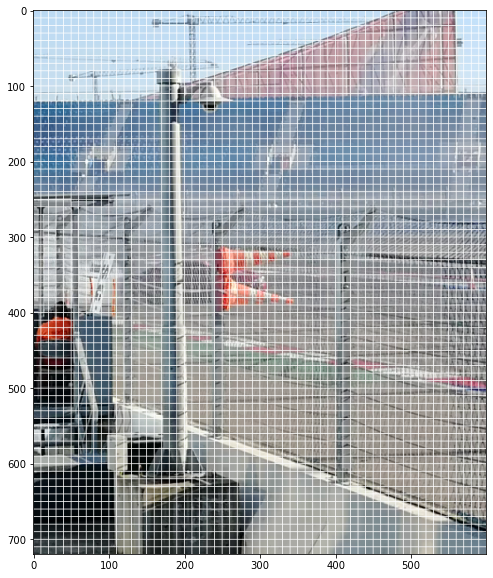

In [28]:
plt.figure(figsize = (10,10))
plt.imshow(rotated)

**Искажение цветов**

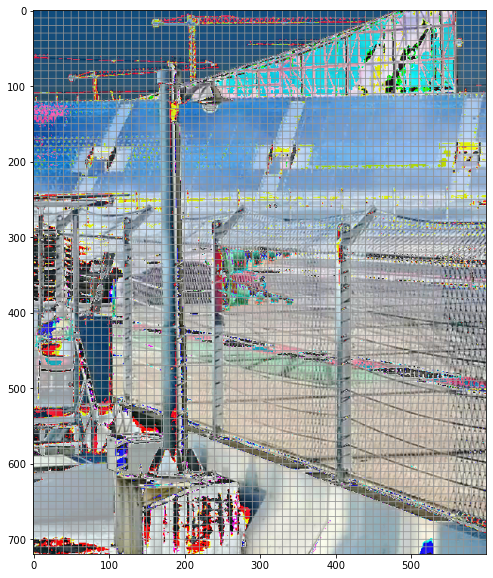

In [29]:
changed_colours = (rotated + 75)*2
plt.figure(figsize = (10,10))
plt.imshow(changed_colours) # цвета немного сломались)

**Добавление шума**

In [30]:
changed_colours_noise = changed_colours.copy()

In [31]:
x = np.random.random_integers(256, size=512)-1
y = np.random.random_integers(256, size=512)-1
z = np.random.random_integers(256, size=512)-1

for i in range(len(x)//3):
    changed_colours_noise[ x[i], y[i] ] = [0, 0, 255]
    changed_colours_noise[ x[512-i-1], y[512-i-1] ] = [0, 255, 0]
    changed_colours_noise[ x[512-i-2], y[512-i-2] ] = [255, 0, 0]

C:\Users\jeka_\AppData\Local\Temp/ipykernel_10076/1545066160.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  x = np.random.random_integers(256, size=512)-1
C:\Users\jeka_\AppData\Local\Temp/ipykernel_10076/1545066160.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  y = np.random.random_integers(256, size=512)-1
C:\Users\jeka_\AppData\Local\Temp/ipykernel_10076/1545066160.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 256 + 1) instead
  z = np.random.random_integers(256, size=512)-1


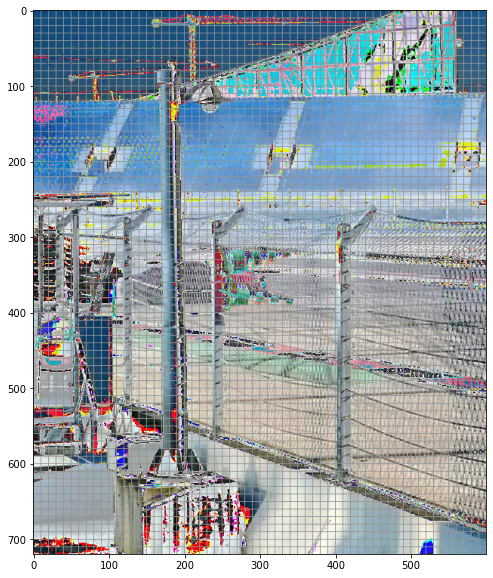

In [32]:
plt.figure(figsize = (10,10))
plt.imshow(changed_colours_noise)
# точки появились, просто они очень маленькие